In [1]:
import sys
import numpy as np
import pandas as pd
import sklearn

In [2]:
#Read CSV and Extract "Pore Limiting Diameter (PLD)" as Label
sum=pd.read_csv('1M1L3D_summary.csv')
PLD=sum['Pore Limiting Diameter']
PLD=PLD.fillna(0)
#PLD.head()

In [3]:
#Read CSV and Extract All "Metal Descriptors" as Feature 1
metals=pd.read_csv('1M1L3D_metal_descriptors.csv')
metals.drop(['refcode', 'Symbol'], axis=1, inplace=True)
metals=metals.fillna(0)
#metals.head()

In [4]:
#Feature 1 Pre-Processing with Sklearn using MinMax
from sklearn.preprocessing import MinMaxScaler
metals_scaler=MinMaxScaler()
metals_std=pd.DataFrame(metals_scaler.fit_transform(metals), columns=metals.columns, index=metals.index)
#metals_std.head()

In [5]:
#Read CSV and Extract Selected "Linker 2D Descriptors" as Feature 2
link_2D=pd.read_csv('1M1L3D_Mordred_2D_descriptors.csv', usecols=['VR2_Dzm','VR2_Dt','ETA_eta_FL','VR2_DzZ','MID_C','BertzCT','ATS1dv','Xp-3d','VR2_Dzp','VR2_Dzse','TpiPC10','SpAD_A','VR2_Dzare','SpAbs_A', 'VR2_Dzpe','VR2_Dzi','VR2_Dzv','ETA_beta','PEOE_VSA7','VR2_D','SMR_VSA7','Xp-7d','Xp-6d','Xp-4d','ETA_eta_RL','ETA_beta_ns','Xp-5d','MID','ABC','SlogP_VSA6','Xp-1d','nBondsM','Zagreb2','nC'])
link_2D=link_2D.fillna(0)
#link_2D.head()

In [6]:
#Feature 2 Pre-Processing with Sklearn using MinMax
from sklearn.preprocessing import MinMaxScaler
link_2D_scaler=MinMaxScaler()
link_2D_std=pd.DataFrame(link_2D_scaler.fit_transform(link_2D), columns=link_2D.columns, index=link_2D.index)
#link_2D_std

In [7]:
#Combining Both the Feature 1 & 2
features=pd.merge(link_2D_std, metals_std, left_index=True, right_index=True)
df=features.merge(PLD, left_index=True, right_index=True)
#df.head()

In [8]:
def apply_class(val):
  if val > 2.5:
    return 1
  else:
    return 0

In [9]:
df["Diameter_Class"]=df['Pore Limiting Diameter'].apply(apply_class)

In [10]:
#Defining Features as X and Label as Y
X=df.drop(['Pore Limiting Diameter', 'Diameter_Class'], axis=1)
Y=df["Diameter_Class"]

In [11]:
#Spliting into Training Set and Testing Set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [12]:
#Logistic Regression (LR) with KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
k=10
kf=KFold(n_splits=k, random_state=None)
logreg=LogisticRegression()

acc_score=[] 

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    Y_train, Y_test = Y[train_index], Y[test_index]
     
    logreg.fit(X_train, Y_train)
    Y_pred=logreg.predict(X_test)
     
    acc=accuracy_score(Y_test,Y_pred)
    acc_score.append(acc)

result_logreg=cross_val_score(logreg, X, Y, cv=kf)
print('accuracy of each fold - {}'.format(acc_score))
print("Avg accuracy: {}".format(result_logreg.mean()))

/Users/kamalbatra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kamalbatra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

accuracy of each fold - [0.7090909090909091, 0.7055944055944056, 0.6335664335664336, 0.6713286713286714, 0.6762237762237763, 0.6783216783216783, 0.6627011896431071, 0.6794961511546536, 0.6648005598320503, 0.6962911126662001]
Avg accuracy: 0.6777414887421885


In [13]:
#Support Vector Machine (SVM) with KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
k=10
kf=KFold(n_splits=k, random_state=None)
svc=SVC(C=1.0, random_state=None, kernel='linear')
 
acc_score=[]
 
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    Y_train, Y_test = Y[train_index], Y[test_index]
     
    svc.fit(X_train, Y_train)
    Y_pred=svc.predict(X_test)
     
    acc=accuracy_score(Y_test,Y_pred)
    acc_score.append(acc)

result_svc=cross_val_score(svc, X, Y, cv=kf)
print('accuracy of each fold - {}'.format(acc_score))
print("Avg accuracy: {}".format(result_svc.mean()))

accuracy of each fold - [0.7027972027972028, 0.7, 0.634965034965035, 0.6909090909090909, 0.6622377622377622, 0.6874125874125874, 0.6738978306508048, 0.6899930020993702, 0.6843946815955213, 0.695591322603219]
Avg accuracy: 0.6822198515270593


In [14]:
#Decision Tree (DT) with KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
k=10
kf=KFold(n_splits=k, random_state=None)
clf=DecisionTreeClassifier()
 
acc_score=[]
 
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    Y_train, Y_test = Y[train_index], Y[test_index]
     
    clf.fit(X_train, Y_train)
    Y_pred=clf.predict(X_test)
     
    acc=accuracy_score(Y_test,Y_pred)
    acc_score.append(acc)

result_clf=cross_val_score(clf, X, Y, cv=kf)
print('accuracy of each fold - {}'.format(acc_score))
print("Avg accuracy: {}".format(result_clf.mean()))

accuracy of each fold - [0.7307692307692307, 0.7587412587412588, 0.676923076923077, 0.7237762237762237, 0.6762237762237763, 0.7237762237762237, 0.7347795661301609, 0.7347795661301609, 0.70888733379986, 0.7172848145556333]
Avg accuracy: 0.7176159180217963


In [15]:
#Random Forest (RF) with KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
k=10
kf=KFold(n_splits=k, random_state=None)
forest=RandomForestClassifier()
 
acc_score=[]
 
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    Y_train, Y_test = Y[train_index], Y[test_index]
     
    forest.fit(X_train, Y_train)
    Y_pred=forest.predict(X_test)
     
    acc=accuracy_score(Y_test, Y_pred)
    acc_score.append(acc)

result_forest=cross_val_score(forest, X, Y, cv=kf)
print('accuracy of each fold - {}'.format(acc_score))
print("Avg accuracy: {}".format(result_forest.mean()))

accuracy of each fold - [0.7552447552447552, 0.7776223776223776, 0.7027972027972028, 0.7419580419580419, 0.7461538461538462, 0.7636363636363637, 0.7585724282715185, 0.7732680195941217, 0.728481455563331, 0.761371588523443]
Avg accuracy: 0.7524499503295864


In [16]:
#K-Nearest Neighbors (K-NN) with KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
k=10
kf=KFold(n_splits=k, random_state=None)
knn=KNeighborsClassifier()
 
acc_score=[]
 
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    Y_train, Y_test = Y[train_index], Y[test_index]
     
    knn.fit(X_train, Y_train)
    Y_pred=knn.predict(X_test)
     
    acc=accuracy_score(Y_test, Y_pred)
    acc_score.append(acc)

result_knn=cross_val_score(knn, X, Y, cv=kf)
print('accuracy of each fold - {}'.format(acc_score))
print("Avg accuracy: {}".format(result_knn.mean()))

accuracy of each fold - [0.7076923076923077, 0.7034965034965035, 0.6552447552447552, 0.6923076923076923, 0.6783216783216783, 0.7391608391608392, 0.7165850244926522, 0.7228831350594822, 0.7025892232330301, 0.6948915325402379]
Avg accuracy: 0.7013172691549178


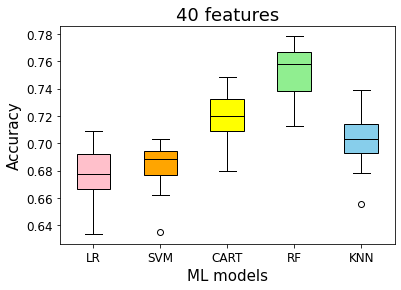

In [17]:
import matplotlib.pyplot as plt
all_results=list([result_logreg, result_svc, result_clf, result_forest, result_knn])
fig, ax=plt.subplots() 
bp=ax.boxplot(all_results, patch_artist = True)
colors = ['pink', 'orange', 'yellow', 'lightgreen', 'skyblue']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
for median in bp['medians']: median.set(color ='black', linewidth = 1.0) 
ax.set_title('40 features', fontsize=18)
ax.set_xlabel('ML models', fontsize=15)
ax.set_ylabel('Accuracy', fontsize=15)
xticklabels=['LR','SVM', 'CART', 'RF', 'KNN']
ax.set_xticklabels(xticklabels, fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('40_Feat.png')
plt.show()